# 🍷 **Wine Quality Prediction using Machine Learning**

### 📘 **Project Overview**
This notebook explores multiple machine learning algorithms to predict the quality of wine based on its chemical properties.  
It includes data analysis, model building, evaluation, and hyperparameter tuning for optimal performance.

---

### 🧠 **Algorithms Implemented**
- Linear Regression  
- Logistic Regression  
- K-Nearest Neighbors (KNN)  
- Naive Bayes (Gaussian, Multinomial, Bernoulli)  
- Decision Tree Regressor  
- Support Vector Machine (SVM)  
- Hyperparameter Tuning using GridSearchCV  

---

### 🧾 **Objective**
To compare the performance of various regression and classification algorithms and determine the best-performing model for predicting wine quality.

---

📅 **Developed:** September 2025  
👨‍💻 **Author:** *Abdul Rahman Mohammed*  


## 🧩 **1. Importing Libraries, Loading Dataset & Exploratory Data Analysis (EDA)**
Performing dataset import, removing unnecessary columns, handling missing values, and visualizing feature correlations.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Wine_Quality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#Removing ID column
df.drop('Id', axis=1, inplace=True)

In [5]:
df.shape

(1143, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Round numeric coulmns with 2 digits
df = df.round(2)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6
1139,6.8,0.62,0.08,1.9,0.07,28.0,38.0,1.00,3.42,0.82,9.5,6
1140,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
1141,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 The 'quality' column is the target variable. The 'Id' column is an identifier and should be dropped.

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 📊 **2. Correlation Heatmap**
Visualizing the correlation between numerical features using a heatmap to identify relationships.

In [11]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250936,0.673157,0.171831,0.106205,-0.164831,-0.110628,0.349704,-0.685163,0.174592,-0.075068,0.121970
volatile acidity,-0.250936,1.000000,-0.544237,-0.005699,0.057861,-0.001520,0.077960,0.076267,0.221748,-0.276098,-0.204156,-0.407444
citric acid,0.673157,-0.544237,1.000000,0.175815,0.241918,-0.057589,0.036871,0.132163,-0.546339,0.331232,0.106240,0.240821
residual sugar,0.171831,-0.005699,0.175815,1.000000,0.067519,0.165339,0.190790,0.119942,-0.116959,0.017475,0.058420,0.022002
chlorides,0.106205,0.057861,0.241918,0.067519,1.000000,0.012003,0.045694,0.181391,-0.275655,0.370758,-0.229685,-0.127547
free sulfur dioxide,-0.164831,-0.001520,-0.057589,0.165339,0.012003,1.000000,0.661093,-0.020710,0.072804,0.034445,-0.047085,-0.063260
total sulfur dioxide,-0.110628,0.077960,0.036871,0.190790,0.045694,0.661093,1.000000,0.055948,-0.059126,0.026894,-0.188153,-0.183339
density,0.349704,0.076267,0.132163,0.119942,0.181391,-0.020710,0.055948,1.000000,-0.240663,0.080633,-0.518872,-0.203836
pH,-0.685163,0.221748,-0.546339,-0.116959,-0.275655,0.072804,-0.059126,-0.240663,1.000000,-0.185499,0.225328,-0.052453
sulphates,0.174592,-0.276098,0.331232,0.017475,0.370758,0.034445,0.026894,0.080633,-0.185499,1.000000,0.094423,0.257710


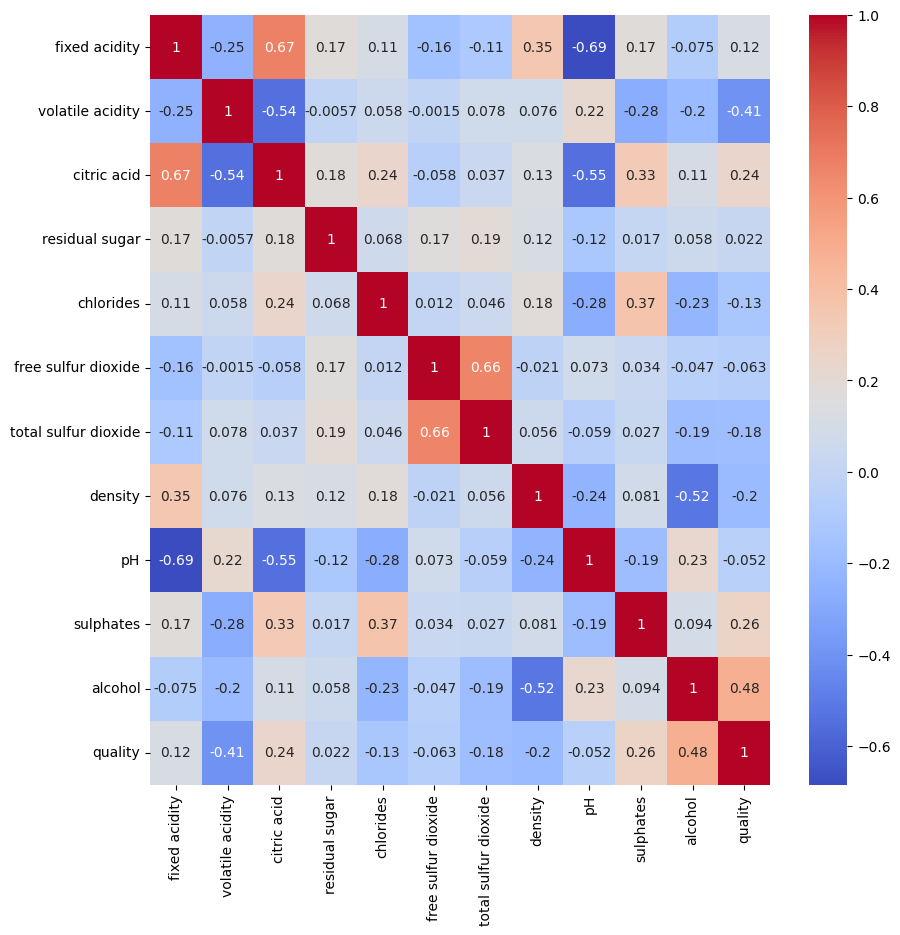

In [12]:
#Correlation heat map
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## 📈 **3. Simple Linear Regression**
Building and evaluating a Linear Regression model to predict wine quality based on numeric attributes.


In [13]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
Linear_Predict = Linear.predict(X_test)

In [15]:
MSE = mean_squared_error(y_test, Linear_Predict)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, Linear_Predict)
R2 = r2_score(y_test, Linear_Predict)
print('Mean Square Error: ', MSE)
print('Root Mean Square Error: ', RMSE)
print('Mean Absolute Error: ', MAE)
print('R2 Score: ', R2)

Mean Square Error:  0.37849868720036056
Root Mean Square Error:  0.6152224696809769
Mean Absolute Error:  0.47560665313054873
R2 Score:  0.3198255892168427


In [16]:
Linear.score(X_train, y_train)

0.3822120373880178

## 🔢 **4. Logistic Regression**
Implementing Logistic Regression to classify wine quality and evaluating performance using accuracy and confusion matrix.


In [17]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
Logistic_Predict = Logistic.predict(X_test)

In [19]:
print(f"Accuracy Score: {accuracy_score(y_test, Logistic_Predict)}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, Logistic_Predict)}\n")
print(f"Classification Report: \n{classification_report(y_test, Logistic_Predict)}")

Accuracy Score: 0.6069868995633187

Confusion Matrix: 
[[ 0  4  2  0  0]
 [ 0 73 22  1  0]
 [ 0 34 64  1  0]
 [ 0  3 21  2  0]
 [ 0  0  1  1  0]]

Classification Report: 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.64      0.76      0.70        96
           6       0.58      0.65      0.61        99
           7       0.40      0.08      0.13        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.32      0.30      0.29       229
weighted avg       0.57      0.61      0.57       229



## 👥 **5. K-Nearest Neighbors (KNN) Classification**
Training a KNN classifier, testing model accuracy, and visualizing the confusion matrix using a heatmap.


In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
KNN_Predict = KNN.predict(X_test)

In [22]:
print(f"Accuracy Score: {accuracy_score(y_test, KNN_Predict)}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, KNN_Predict)}\n")
print(f"Classification Report: \n{classification_report(y_test, KNN_Predict)}")

Accuracy Score: 0.5152838427947598

Confusion Matrix: 
[[ 0  4  2  0  0]
 [ 1 68 27  0  0]
 [ 0 50 43  6  0]
 [ 0  5 13  7  1]
 [ 0  1  1  0  0]]

Classification Report: 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.53      0.71      0.61        96
           6       0.50      0.43      0.46        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.52       229
   macro avg       0.31      0.28      0.29       229
weighted avg       0.50      0.52      0.50       229



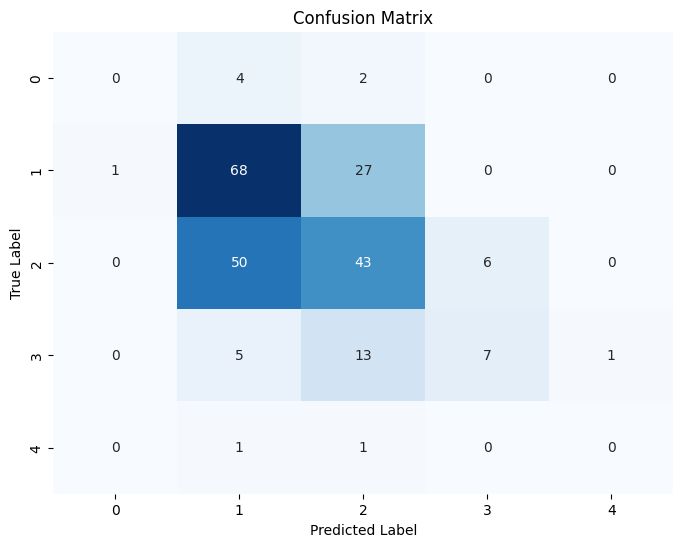

In [23]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, KNN_Predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 🧮 **6. Naive Bayes Classifiers**
Applying Gaussian, Multinomial, and Bernoulli Naive Bayes models with appropriate preprocessing and comparing their accuracies visually.

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [25]:
#GaussianNB Naive Bayes
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

GNB = GaussianNB()
GNB.fit(X_train_sc, y_train)
y_predict_G = GNB.predict(X_test_sc)
Acc_G = accuracy_score(y_test, y_predict_G)

In [26]:
# 2. Multinomial Naive Bayes
# ----------------------
# MultinomialNB requires positive integer-like values
sc_mm = MinMaxScaler()
X_train_m = sc_mm.fit_transform(X_train)
X_test_m = sc_mm.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_m, y_train)
y_pred_m = mnb.predict(X_test_m)
acc_m = accuracy_score(y_test, y_pred_m)

In [27]:
# 3. Bernoulli Naive Bayes
# ----------------------
# Convert features to binary using threshold
binz = Binarizer(threshold=0.5)
X_train_b = binz.fit_transform(X_train_m)
X_test_b = binz.transform(X_test_m)

bnb = BernoulliNB()
bnb.fit(X_train_b, y_train)
y_pred_b = bnb.predict(X_test_b)
acc_b = accuracy_score(y_test, y_pred_b)

In [28]:
print('Accuracy of Gaussian Naive Bayes: ', Acc_G)
print('Accuracy of Multinomial Naive Bayes: ', acc_m)
print('Accuracy of Bernoulli Naive Bayes: ', acc_b)

Accuracy of Gaussian Naive Bayes:  0.5982532751091703
Accuracy of Multinomial Naive Bayes:  0.5764192139737991
Accuracy of Bernoulli Naive Bayes:  0.5676855895196506


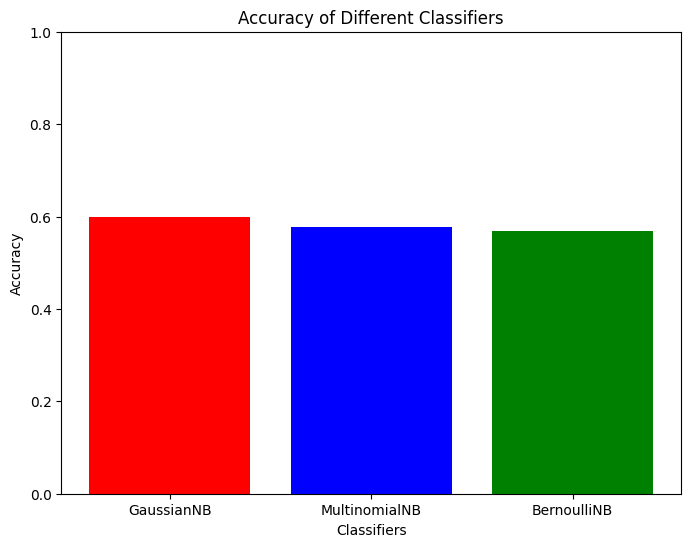

In [29]:
Accuracies = {
    "GaussianNB": accuracy_score(y_test, y_predict_G),
    "MultinomialNB": accuracy_score(y_test, y_pred_m),
    "BernoulliNB": accuracy_score(y_test, y_pred_b)
}

#Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(Accuracies.keys(), Accuracies.values(), color = ["Red", "Blue", "Green"])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # accuracies between 0 and 1
plt.title('Accuracy of Different Classifiers')
plt.show()

## 🌳 **7. Decision Tree Regression**
Building a Decision Tree Regressor to predict wine quality, evaluating regression metrics, and visualizing feature importances.


In [30]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state= 42)
DT.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [31]:
DT_Predict = DT.predict(X_test)

In [32]:
# Regression Metrics
mae = mean_absolute_error(y_test, DT_Predict)
mse = mean_squared_error(y_test, DT_Predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, DT_Predict)

print("📊 Regression Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Regression Metrics:
MAE: 0.5066
MSE: 0.6463
RMSE: 0.8039
R² Score: -0.1614


In [33]:
# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': DT.feature_importances_
}).sort_values(by='importance', ascending=False)

# Print the most important features
print("Top 10 Most Important Features for Wine Quality:")
print(feature_importances.head(10))

Top 10 Most Important Features for Wine Quality:
                 feature  importance
10               alcohol    0.277874
1       volatile acidity    0.162730
9              sulphates    0.125160
8                     pH    0.080899
6   total sulfur dioxide    0.075309
3         residual sugar    0.071941
0          fixed acidity    0.063245
5    free sulfur dioxide    0.061807
2            citric acid    0.040630
4              chlorides    0.036062


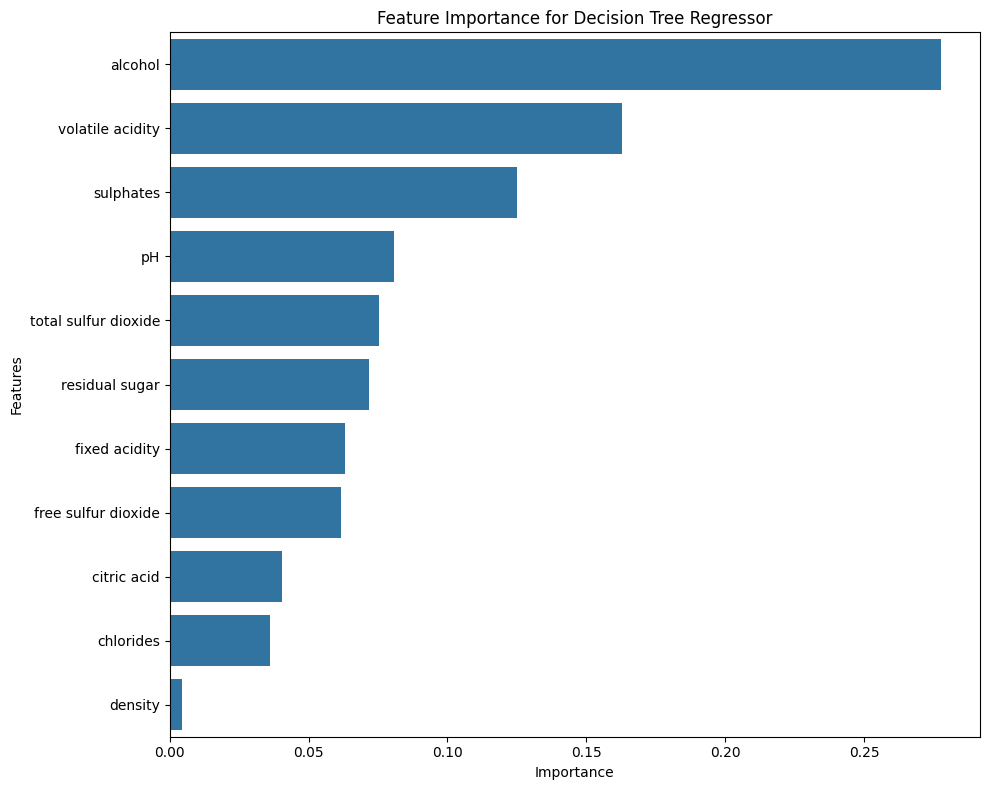

In [34]:
# Create a horizontal bar plot for feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance for Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## ⚙️ **8. Support Vector Machine (SVM)**
Training an SVM classifier using scaled data and evaluating its performance through confusion matrix and classification report.


In [35]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf', random_state= 0)
SVM.fit(X_train_sc, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
SVM_Predict = SVM.predict(X_test_sc)

In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test, SVM_Predict))
print("\nClassification Report:\n", classification_report(y_test, SVM_Predict))
print("\nAccuracy:", accuracy_score(y_test, SVM_Predict))

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 69  4  0]
 [ 0  1 15 10  0]
 [ 0  0  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.61      0.70      0.65        99
           7       0.67      0.38      0.49        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.63      0.66      0.64       229


Accuracy: 0.6550218340611353


In [40]:
# ==========================
# 🔍 HYPERPARAMETER TUNING
# ==========================
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("Starting Hyperparameter Tuning...\n")

# --------------------------------------------------------
# 1️⃣ LOGISTIC REGRESSION HYPERPARAMETER TUNING
# --------------------------------------------------------
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'none']
}

grid_log = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_log,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_log.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_log.best_params_)
print("Best Logistic Regression Score (CV):", grid_log.best_score_)
best_log_model = grid_log.best_estimator_
log_pred = best_log_model.predict(X_test)

print("\nTuned Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, log_pred)}")
print(f"Classification Report:\n{classification_report(y_test, log_pred)}")




Starting Hyperparameter Tuning...

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Score (CV): 0.5995136011529454

Tuned Logistic Regression Evaluation:
Accuracy: 0.6419
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 72 22  2  0]
 [ 0 30 62  7  0]
 [ 0  2 11 13  0]
 [ 0  0  0  2  0]]
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.67      0.75      0.71        96
           6       0.63      0.63      0.63        99
           7       0.54      0.50      0.52        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.38      0.37       229
weighted avg       0.62      0.64      0.63       229



In [41]:
# --------------------------------------------------------
# 2️⃣ K-NEAREST NEIGHBORS HYPERPARAMETER TUNING
# --------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_knn.fit(X_train, y_train)

print("\nBest KNN Parameters:", grid_knn.best_params_)
print("Best KNN Score (CV):", grid_knn.best_score_)
best_knn_model = grid_knn.best_estimator_
knn_pred = best_knn_model.predict(X_test)

print("\nTuned KNN Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_pred)}")
print(f"Classification Report:\n{classification_report(y_test, knn_pred)}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}
Best KNN Score (CV): 0.5897015552753258

Tuned KNN Evaluation:
Accuracy: 0.6987
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 73 23  0  0]
 [ 0 21 74  4  0]
 [ 0  2 11 13  0]
 [ 0  0  2  0  0]]
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.76      0.75        96
           6       0.65      0.75      0.70        99
           7       0.76      0.50      0.60        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.43      0.40      0.41       229
weighted avg       0.68      0.70      0.68       229



In [42]:
# --------------------------------------------------------
# 3️⃣ LINEAR REGRESSION (for regression task)
# --------------------------------------------------------
from sklearn.linear_model import LinearRegression

# LinearRegression has no major hyperparameters to tune via grid search.
# We'll check if normalization or fit_intercept affects performance.

param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_linear = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid_linear,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_linear.fit(X_train, y_train)

print("\nBest Linear Regression Parameters:", grid_linear.best_params_)
print("Best Linear Regression R2 (CV):", grid_linear.best_score_)

best_lin_model = grid_linear.best_estimator_
lin_pred = best_lin_model.predict(X_test)

print("\nTuned Linear Regression Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, lin_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, lin_pred)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lin_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, lin_pred):.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Linear Regression Parameters: {'fit_intercept': False, 'positive': False}
Best Linear Regression R2 (CV): 0.3550331911655188

Tuned Linear Regression Evaluation:
Mean Squared Error: 0.3784
Root Mean Squared Error: 0.6151
Mean Absolute Error: 0.4752
R2 Score: 0.3200


In [43]:

# --------------------------------------------------------
# 🧾 CONCLUSION
# --------------------------------------------------------
print("\n========= FINAL COMPARISON =========")
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print(f"Best KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Best Linear Regression R2: {r2_score(y_test, lin_pred):.4f}")

print("\n✅ Hyperparameter tuning completed successfully!")



========= FINAL COMPARISON =========
Best Logistic Regression Accuracy: 0.6419
Best KNN Accuracy: 0.6987
Best Linear Regression R2: 0.3200

✅ Hyperparameter tuning completed successfully!


## 🧾 **10. Conclusion & Model Comparison**
Displaying and comparing the final optimized performance of all tuned models.
